In [2]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['ca38ca386b7346208f1b4701dfefe90e.f-id.6312d085fc5843798096bc0b496b7a6d']
ds = experiment.get_intermediate_dataset(
    node_id='18f4a7bd-1a09-45b1-8f5f-a9840161938e-4064',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [3]:
frame.head(5)

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,dayOfWeek,days
0,1,0,1,0,0,0,1,-1.334648,0.947372,-1.553889,16,Sat,0
1,1,0,1,1,0,0,1,-1.438516,0.895539,-1.553889,40,Sat,0
2,1,0,1,2,0,0,1,-1.438516,0.895539,-1.553889,32,Sat,0
3,1,0,1,3,0,0,1,-1.334648,0.636370,-1.553889,13,Sat,0
4,1,0,1,4,0,0,1,-1.334648,0.636370,-1.553889,1,Sat,0


In [4]:
def bike_scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    for col in cols:
        fig = plt.figure(figsize = (8, 6))        
        ax = fig.gca()
        los = lw.lowess(df['cnt'], df[col], frac = 0.3)
        df.plot(kind = 'scatter', x = col, y = 'cnt', ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color= 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)
        

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


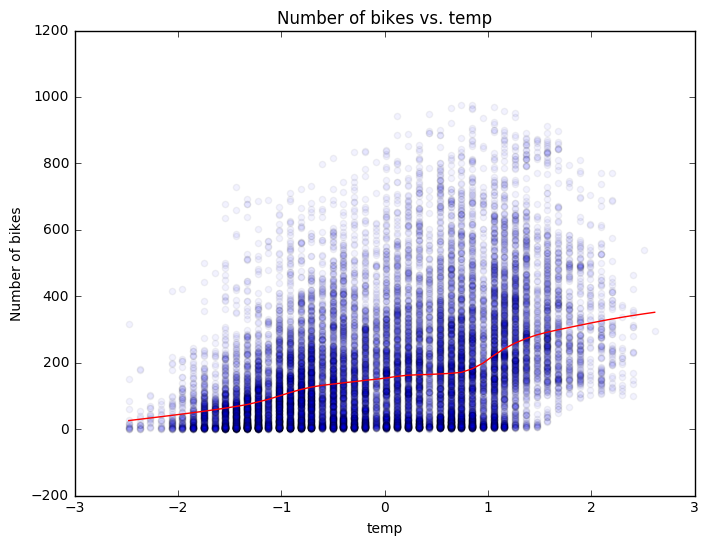

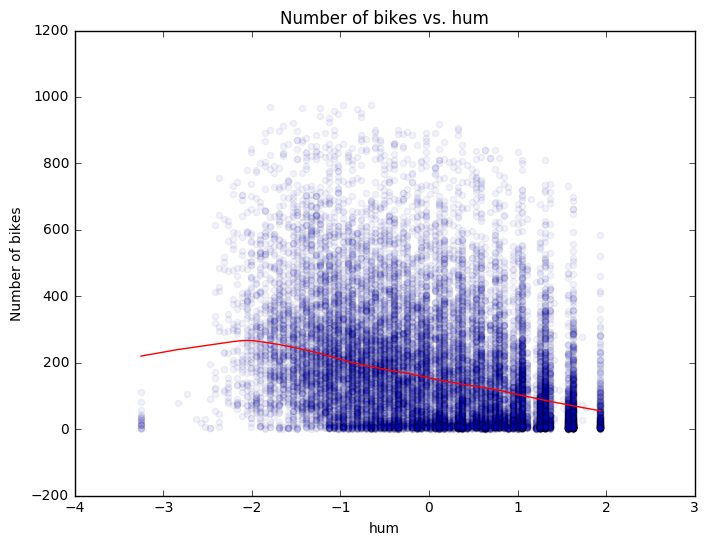

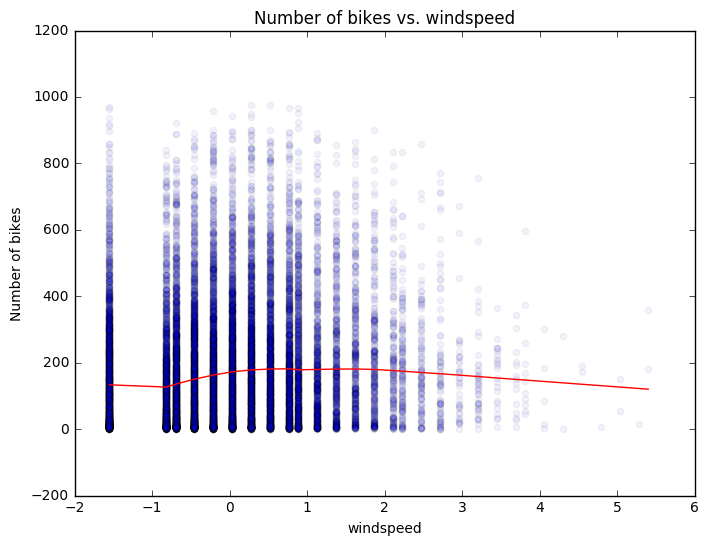

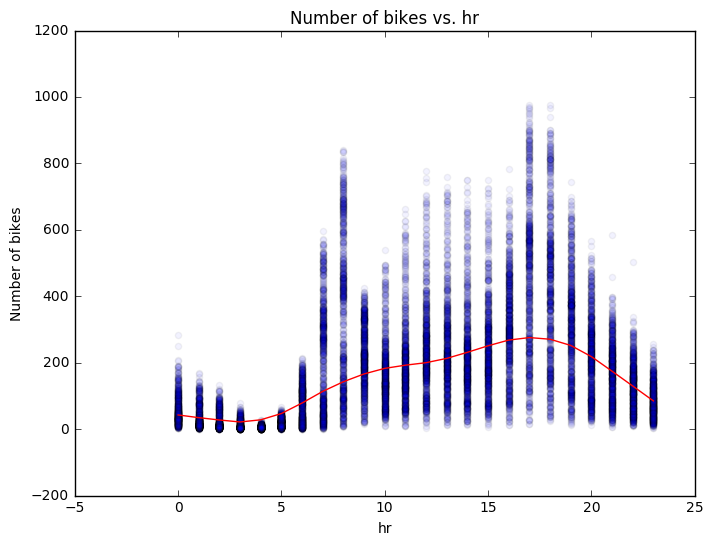

In [5]:
%matplotlib inline
bike_scatter(frame, ['temp', 'hum', 'windspeed', 'hr'])

In [6]:
def bike_box(df, cols):
    import matplotlib.pyplot as plt    
    for col in cols:
        fig = plt.figure(figsize = (8, 6))
        ax = fig.gca()
        df.boxplot(column = 'cnt', by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)
        

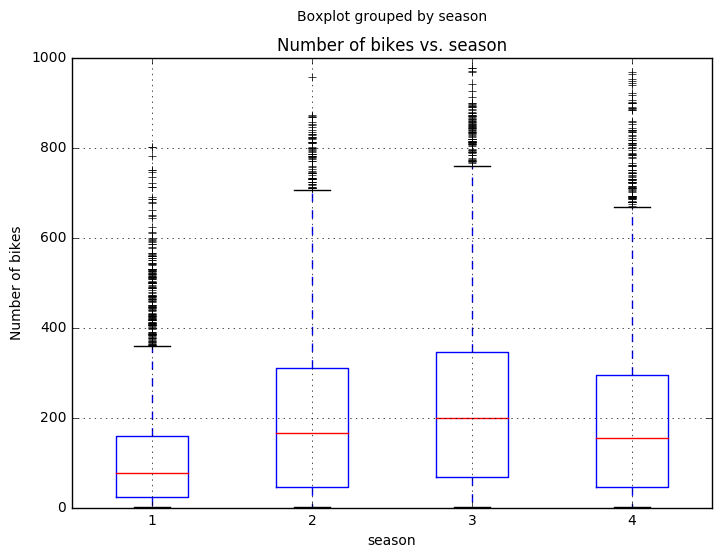

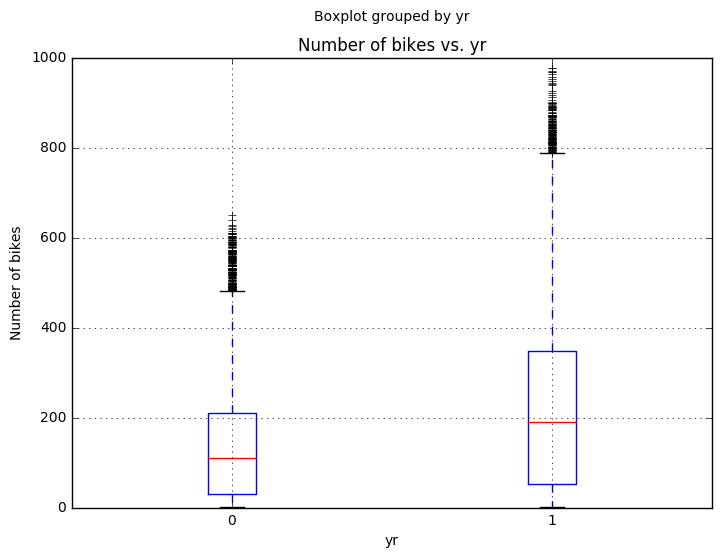

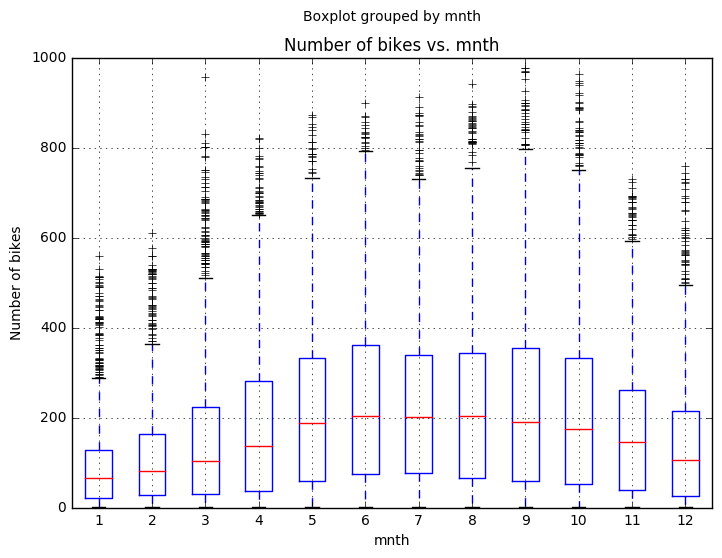

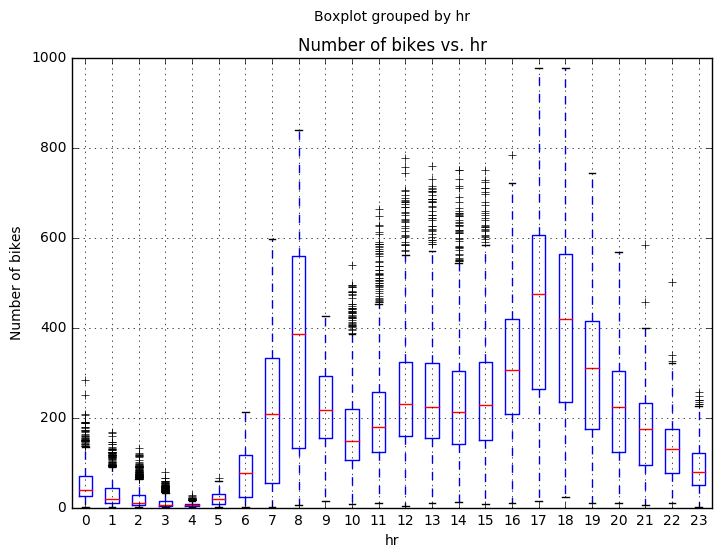

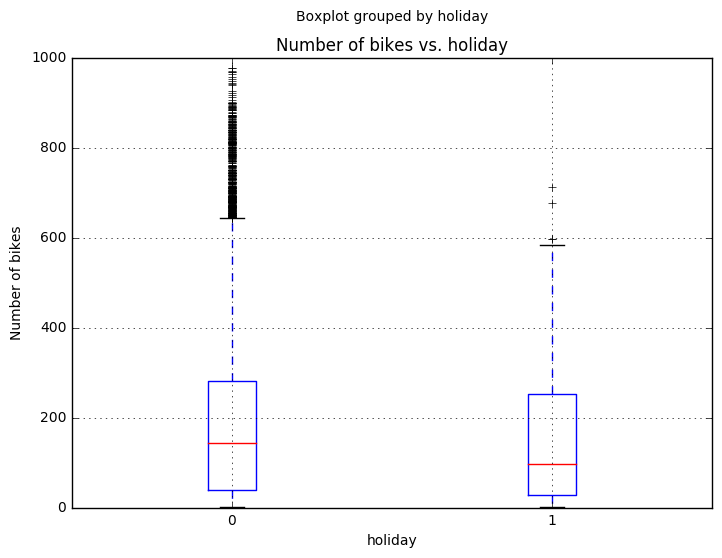

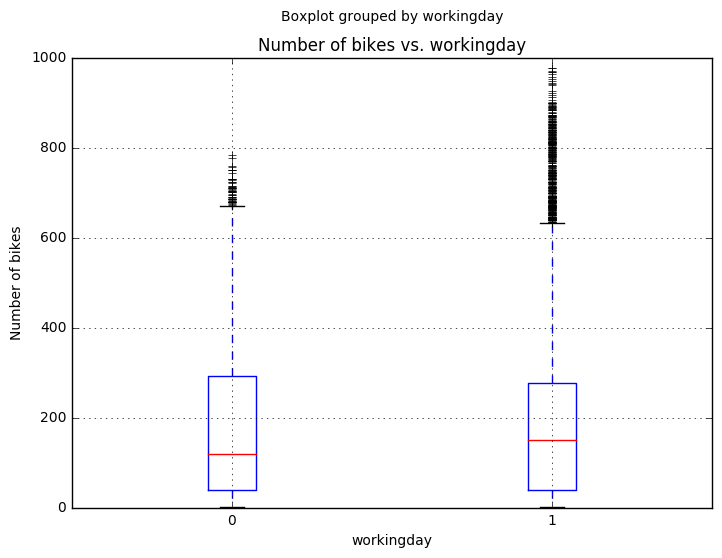

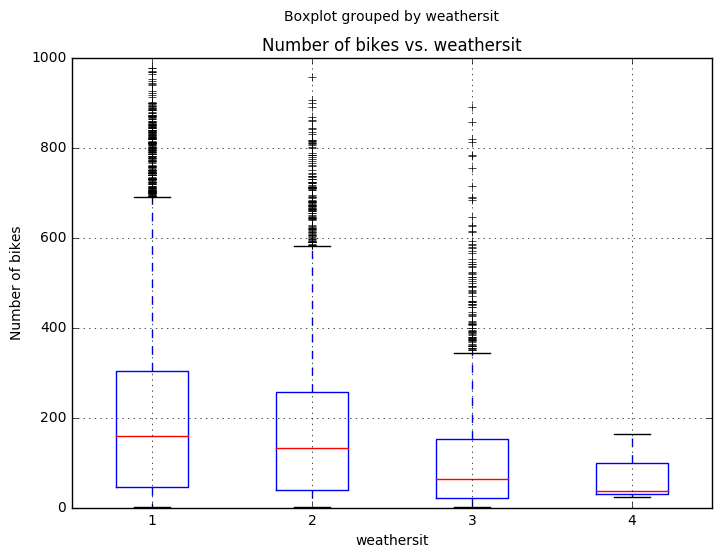

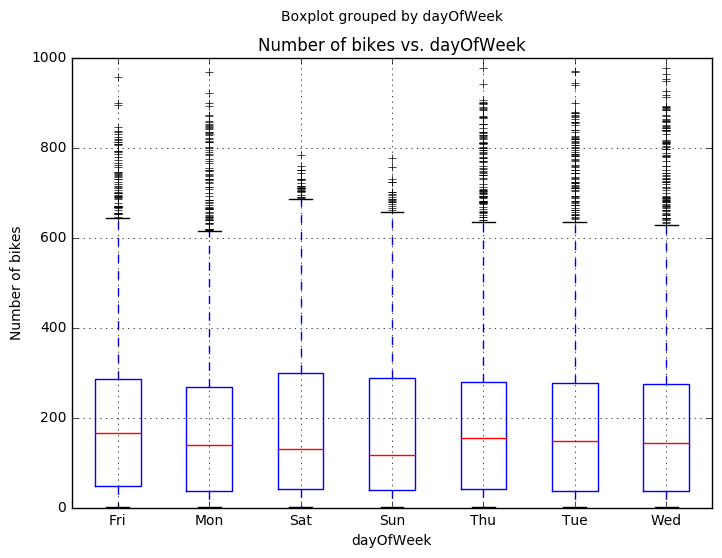

In [7]:
bike_box(frame, ['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit', 'dayOfWeek'])

In [8]:
def bike_series(df, tms):
    import matplotlib.pyplot as plt
    lims = (min(df.cnt), max(df.cnt))
    for col in tms:
        fig = plt.figure()
        ax = fig.gca()
        df[df.hr == col].plot(kind = 'line', x = 'days', y = 'cnt', ax = ax, ylim = lims)
        ax.set_label('Days from start')
        ax.set_ylabel('Bikes Rented')
        ax.set_title('Bikes rented by day for hour ' + str(col))

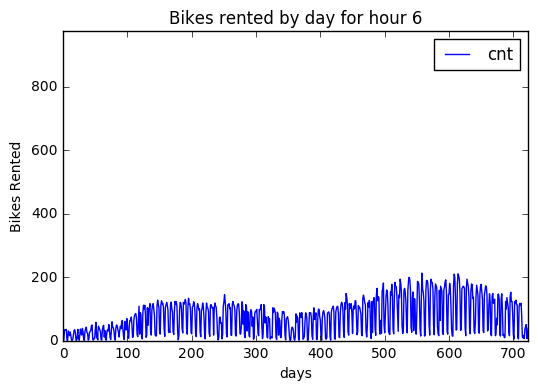

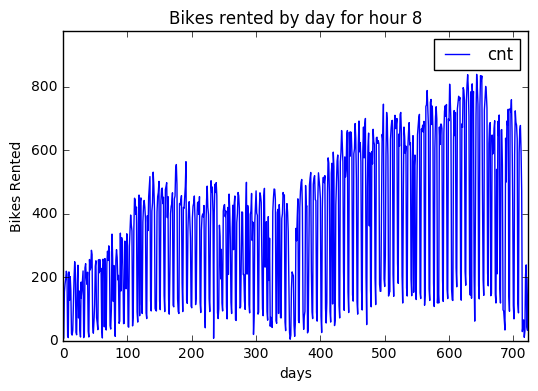

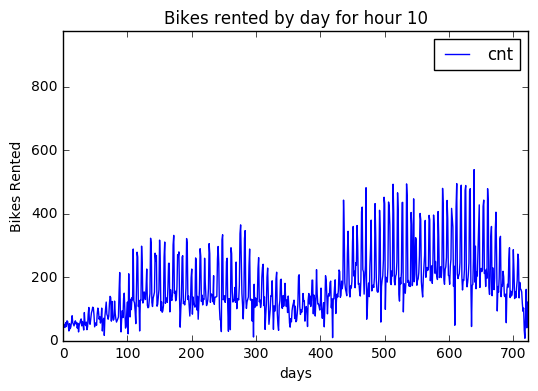

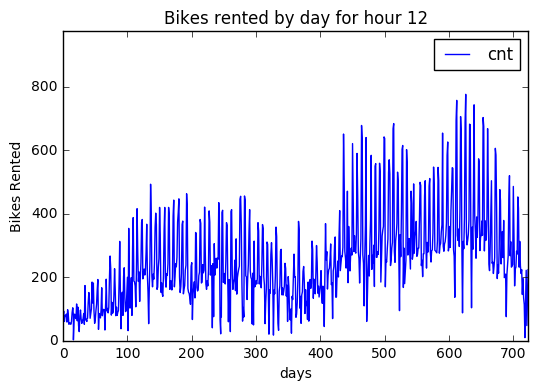

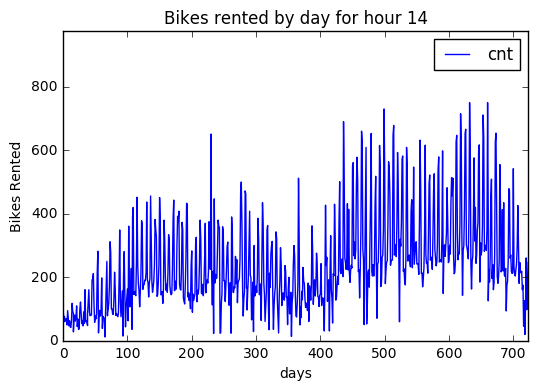

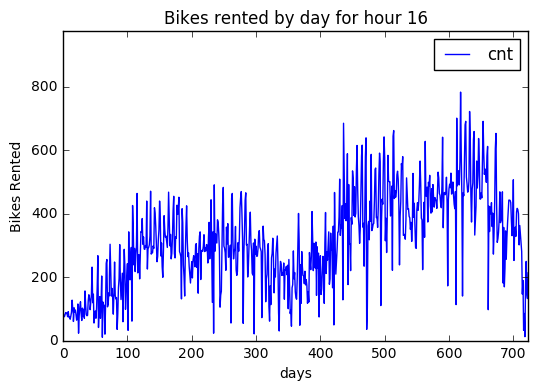

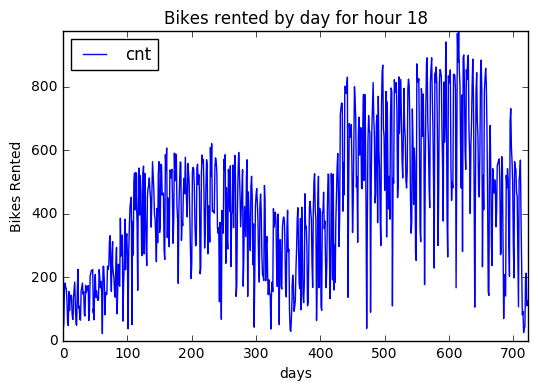

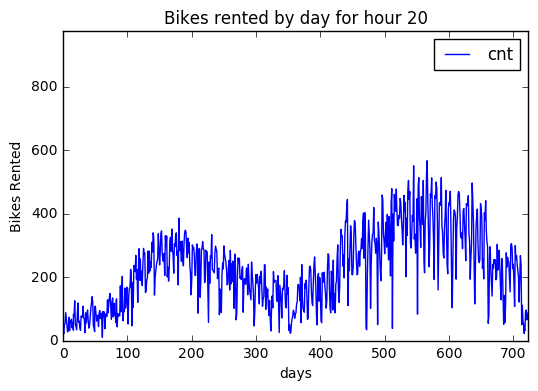

In [9]:
bike_series(frame, [6, 8, 10, 12, 14, 16, 18, 20])

In [10]:
def bike_hist_cond(df, col, by):
    import matplotlib.pyplot as plt
    df = df[df.hr.isin(by)]
    print(df.head(5))
    fig = plt.figure(figsize = (10, 8))
    ax = fig.gca()    
    df[[col, 'hr']].hist(ax = ax, by = ['hr'], bins = 30)
    
def bike_hist(df, cols):
    import matplotlib.pyplot as plt    
    for col in cols:
        fig = plt.figure(figsize = (10, 8))
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col)

    season  yr  mnth  hr  holiday  workingday  weathersit      temp       hum  \
6        1   0     1   6        0           0           1 -1.438516  0.895539   
8        1   0     1   8        0           0           1 -1.334648  0.636370   
10       1   0     1  10        0           0           1 -0.607566  0.688203   
12       1   0     1  12        0           0           1 -0.399828  0.740037   
14       1   0     1  14        0           0           2 -0.192091  0.480868   

    windspeed  cnt dayOfWeek  days  
6   -1.553889    2       Sat     0  
8   -1.553889    8       Sat     0  
10   0.519896   36       Sat     0  
12   0.764304   84       Sat     0  
14   0.764304  106       Sat     0  


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/pandas/tools/plotting.py:2909: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


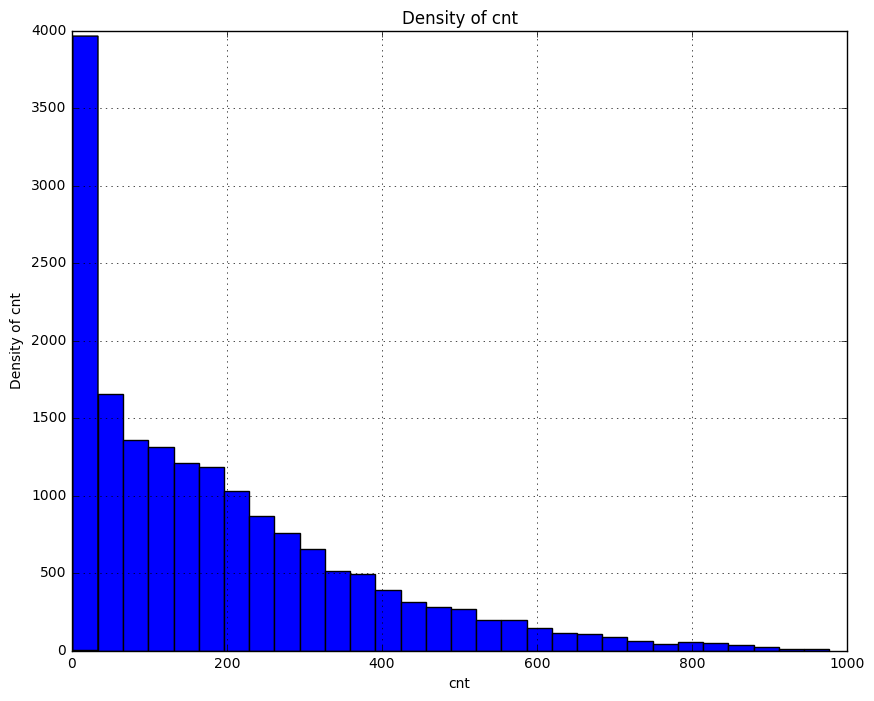

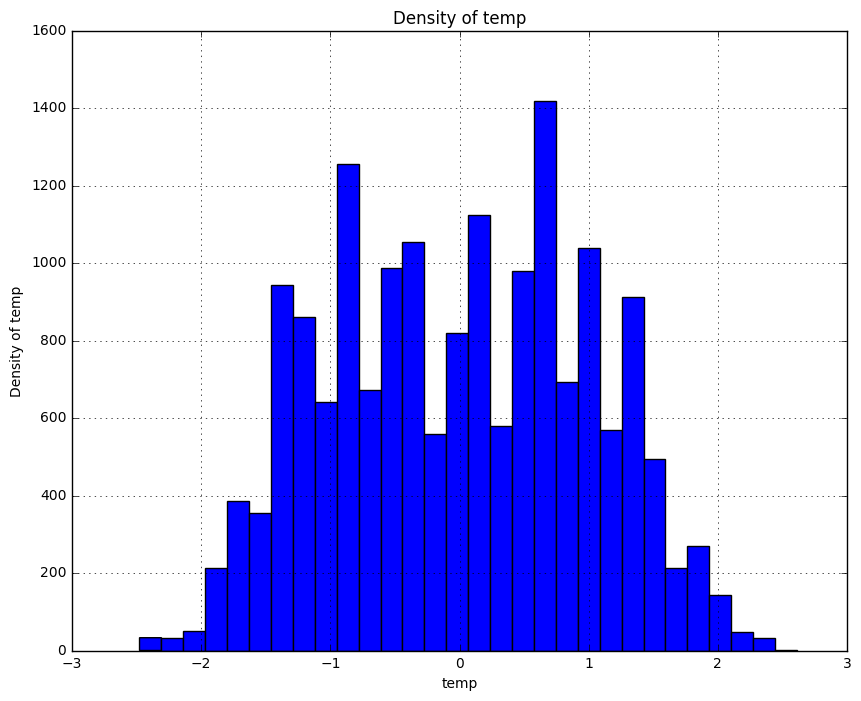

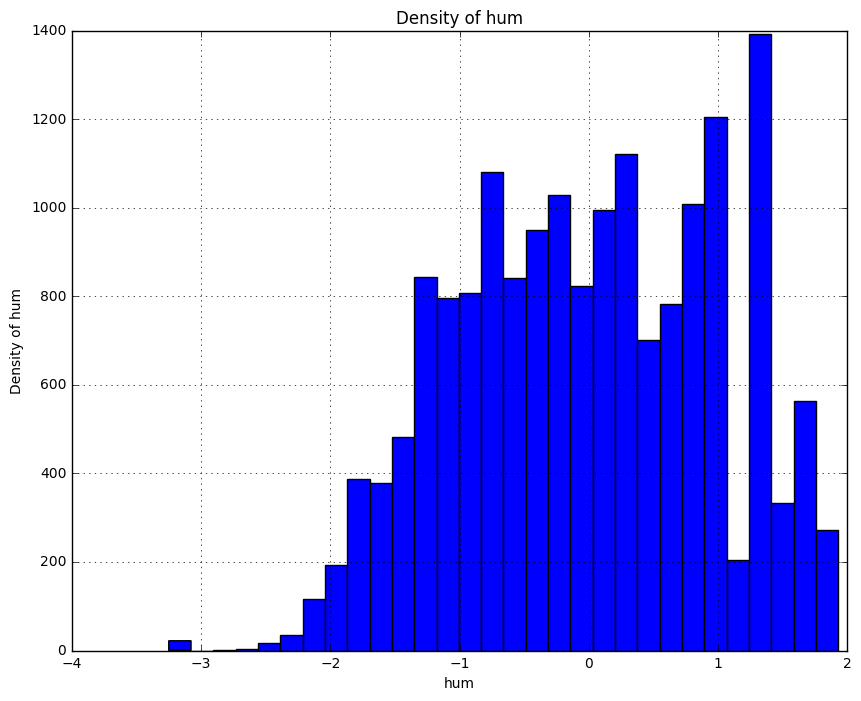

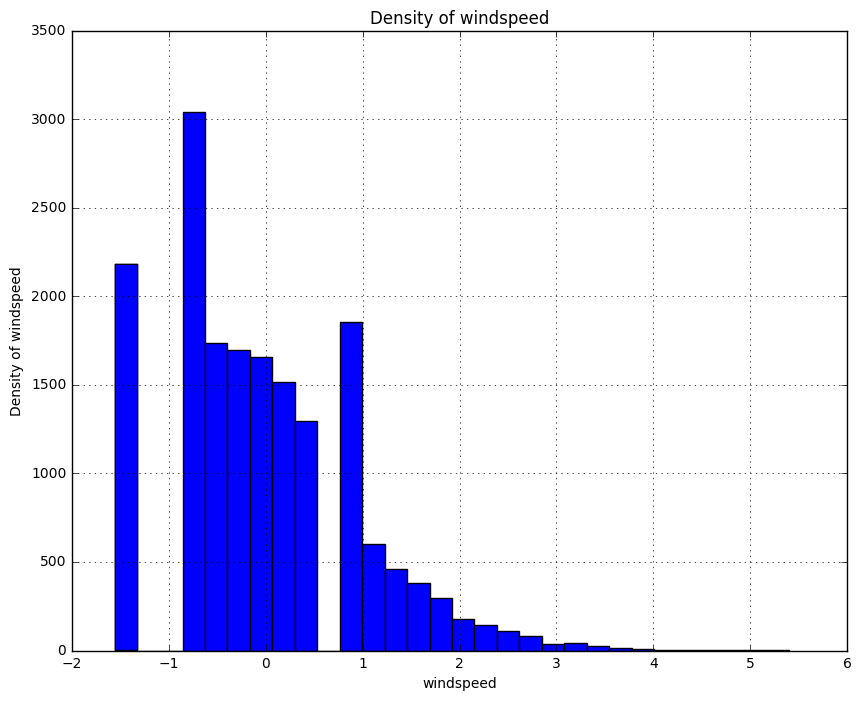

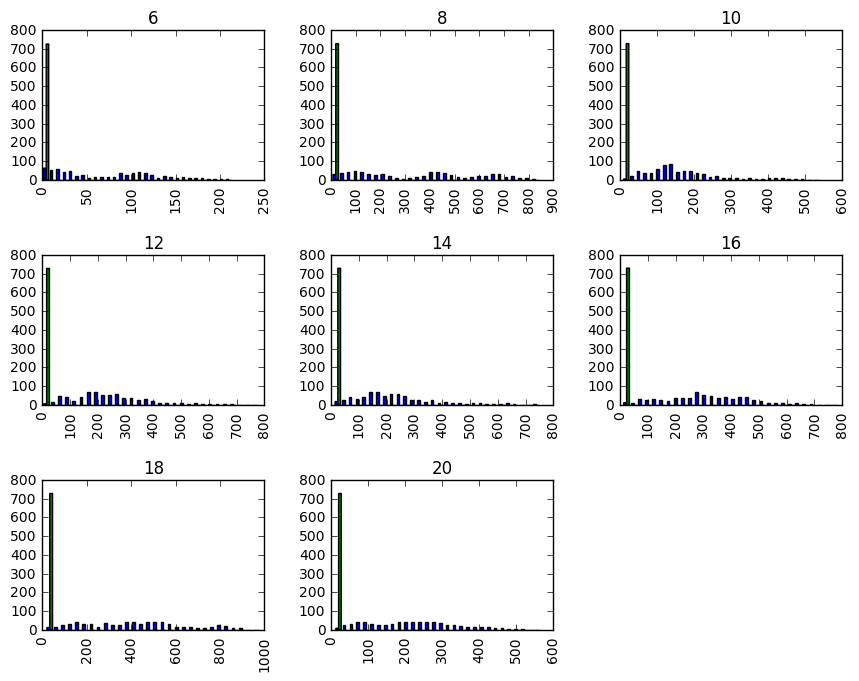

In [11]:
bike_hist(frame, ['cnt', 'temp', 'hum', 'windspeed'])
bike_hist_cond(frame, 'cnt', [6, 8, 10, 12, 14, 16, 18, 20])